In [132]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
#Reading test and train data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [135]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

In [137]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [140]:
#Checking for empty rows
train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [141]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [143]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [145]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# EDA

In [148]:
#Filling Homeplanet column with 'Not Defined'
train['HomePlanet'].fillna('Not Defined',inplace=True)
test['HomePlanet'].fillna('Not Defined',inplace=True)

In [151]:
#Filling Destination column with 'Not Defined'
train['Destination'].fillna('Not Defined',inplace=True)
test['Destination'].fillna('Not Defined',inplace=True)

In [164]:
#Creating a new column for total amount of Monet spent by passengers on amenities
train['Money_spent']=train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
test['Money_spent']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']

In [163]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Money_spent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0


<AxesSubplot:title={'center':'Money_spent'}, xlabel='CryoSleep'>

<Figure size 5760x432 with 0 Axes>

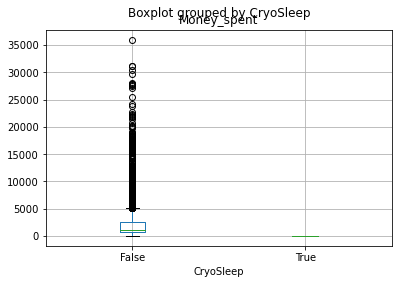

In [167]:
#Checking relation of Cryosleep column with Money_spent
plt.figure(figsize=(80,6))
train.boxplot(column='Money_spent',by='CryoSleep')

<AxesSubplot:title={'center':'Money_spent'}, xlabel='CryoSleep'>

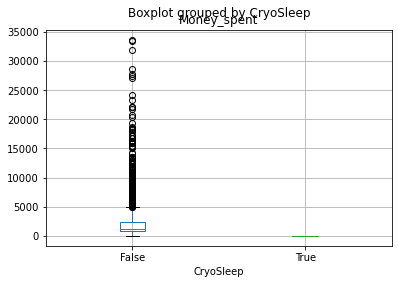

In [169]:
test.boxplot(column='Money_spent',by='CryoSleep')

Analysis : Cryosleep column is True for passengers who spent zero amount on amenities

<AxesSubplot:title={'center':'Age'}, xlabel='CryoSleep'>

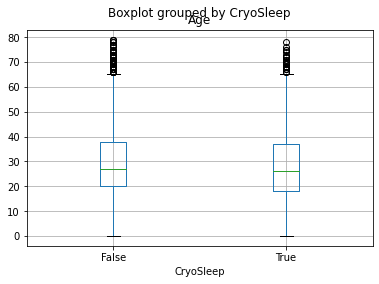

In [171]:
train.boxplot(column='Age',by='CryoSleep')

<AxesSubplot:title={'center':'Age'}, xlabel='CryoSleep'>

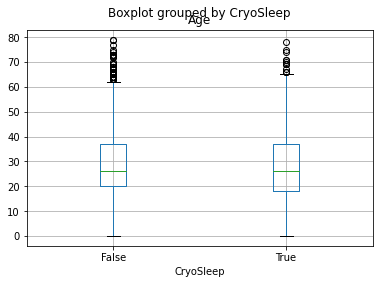

In [172]:
test.boxplot(column='Age',by='CryoSleep')

Analysis : Mean of True or False is same when compared with Age column. It's better to fill null values by Money spent column

In [177]:
train['CryoSleep'].fillna(value=(df['Money_spent']==0),inplace=True)
test['CryoSleep'].fillna(value=(df['Money_spent']==0),inplace=True)

In [180]:
#Extraction only 'P' or 'S' from Cabin column into a new column
train['CabinSide']=train['Cabin'].str.split('/',expand=True)[2]
test['CabinSide']=test['Cabin'].str.split('/',expand=True)[2]

In [184]:
#Dropping Cabin column as it doesn't provide much information
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [188]:
test['CabinSide'].isnull().sum()

100

In [189]:
train['Money_spent'].fillna(train['Money_spent'].mean(),inplace=True) #Filling null values with mean
test['Money_spent'].fillna(test['Money_spent'].mean(),inplace=True)

<AxesSubplot:title={'center':'Money_spent'}, xlabel='CabinSide'>

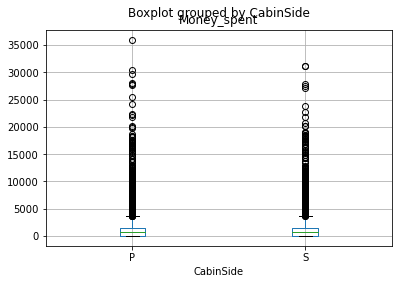

In [192]:
train.boxplot(column='Money_spent',by='CabinSide') #Checking relation b/w cabinside and money_spent. Doesn't give much info

<AxesSubplot:title={'center':'Money_spent'}, xlabel='CabinSide'>

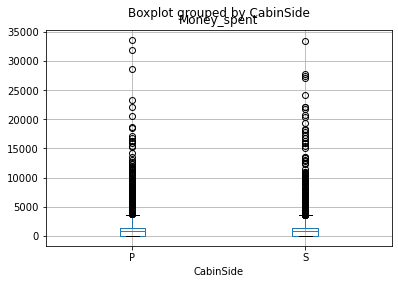

In [193]:
test.boxplot(column='Money_spent',by='CabinSide')

In [195]:
test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age             91
VIP             93
Name            94
Money_spent      0
CabinSide      100
dtype: int64

In [196]:
train['Age'].fillna(df['Age'].median(),inplace=True)
test['Age'].fillna(df['Age'].median(),inplace=True)

In [200]:
#Define function for age group
def fage(x):
    if x>=0 and x<=20:
        return '0-20'
    elif x>=21 and x<=40:
        return '21-40'
    elif x>=41 and x<=60:
        return '41-60'
    elif x>=61 and x<=80:
        return '60-80'
    else:
        return 'Greater than 80'

In [206]:
train['AgeGroup']=train['Age'].apply(fage)
test['AgeGroup']=test['Age'].apply(fage)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

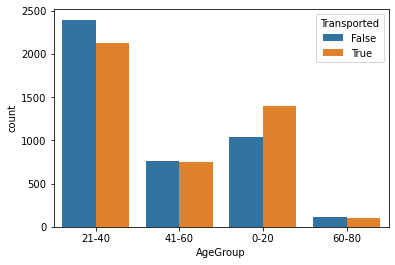

In [207]:
sns.countplot(data=train,x='AgeGroup',hue='Transported')

In [205]:
train.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP            203
Name           200
Transported      0
Money_spent      0
CabinSide      199
AgeGroup         0
dtype: int64

False    4110
True       74
Name: VIP, dtype: int64

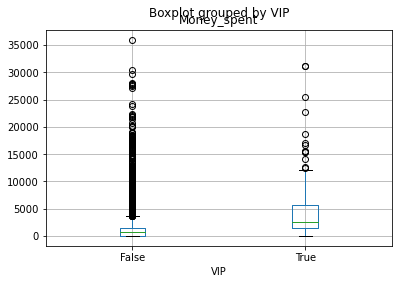

In [210]:
train.boxplot(column='Money_spent',by='VIP') #Very less numbers of VIP spent money on amenities
test['VIP'].value_counts()

In [211]:
train['VIP'].fillna(False,inplace=True) #As false has higher number
test['VIP'].fillna(False,inplace=True)

In [215]:
train.drop(['Name','Age'],axis=1,inplace=True)
test.drop(['Name','Age'],axis=1,inplace=True)#Name  and Age doesn't provide useful info

<AxesSubplot:title={'center':'Money_spent'}, xlabel='CabinSide'>

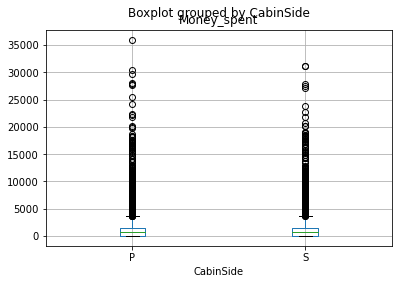

In [219]:
train.boxplot(column='Money_spent',by='CabinSide')

<AxesSubplot:xlabel='AgeGroup'>

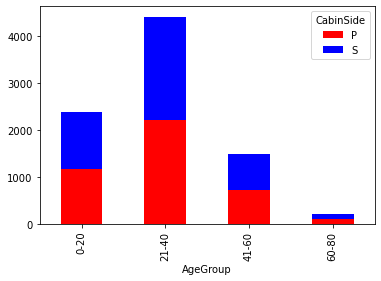

In [220]:
Temp=pd.crosstab(train['AgeGroup'],train['CabinSide'])
Temp.plot(kind='bar',stacked=True,color=['red','blue'])

In [223]:
train['CabinSide'].value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

In [224]:
train['CabinSide'].fillna('P',inplace=True)
test['CabinSide'].fillna('P',inplace=True)

In [225]:
train.isnull().sum() #Data is cleaned

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Transported    0
Money_spent    0
CabinSide      0
AgeGroup       0
dtype: int64

In [226]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   HomePlanet   8693 non-null   object 
 2   CryoSleep    8693 non-null   bool   
 3   Destination  8693 non-null   object 
 4   VIP          8693 non-null   bool   
 5   Transported  8693 non-null   bool   
 6   Money_spent  8693 non-null   float64
 7   CabinSide    8693 non-null   object 
 8   AgeGroup     8693 non-null   object 
dtypes: bool(3), float64(1), object(5)
memory usage: 433.1+ KB


In [227]:
train.sort_values('PassengerId',inplace=True)
test.sort_values('PassengerId',inplace=True)

In [228]:
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [239]:
col=['HomePlanet','CryoSleep','Destination','VIP','Transported','CabinSide','AgeGroup']
col1=['HomePlanet','CryoSleep','Destination','VIP','CabinSide','AgeGroup']

In [232]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [235]:
for i in col:
    train[i]=le.fit_transform(train[i])

In [240]:
for i in col1:
    test[i]=le.fit_transform(test[i])

In [242]:
test

,HomePlanet,CryoSleep,Destination,VIP,Money_spent,CabinSide,AgeGroup
0,0,1,3,0,0.0,1,1
1,0,0,3,0,2832.0,1,0
2,1,1,0,0,0.0,1,1
3,1,0,3,0,7418.0,1,1
4,0,0,3,0,645.0,1,0
...,...,...,...,...,...,...,...
4272,0,1,3,0,0.0,1,1
4273,0,0,3,0,1018.0,0,2
4274,2,1,0,0,0.0,0,1
4275,1,0,1,0,3203.0,0,1


<AxesSubplot:>

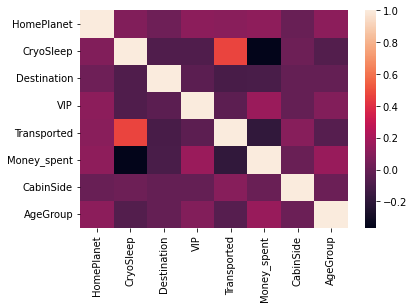

In [243]:
sns.heatmap(train.corr())

# Classification model

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [277]:
rf=RandomForestClassifier(n_estimators=150,random_state=42)

In [278]:
X_train=train.drop('Transported',axis=1)
y_train=train['Transported']

In [279]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [280]:
prediction=rf.predict(test)

In [281]:
score=round(rf.score(X_train, y_train) * 100, 2)
print('Score for RF model: ',score)

Score for RF model:  87.53


In [251]:
prediction

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [253]:
#Preparing Data for output format
df=pd.read_csv('test.csv')

In [257]:
df.drop(['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa'
        ,'VRDeck','Name'],axis=1,inplace=True)

In [261]:
Predictions=pd.DataFrame(prediction,columns=['Transported'])

In [263]:
result=pd.concat([df,Predictions],axis=1)

In [282]:
result.to_csv('Submission.csv',index=False)